# Layernorm

### 神经网络本来就是要学习数据的分布，要是分布一直在变，学习就很难了
### 由于训练数据和测试数据存在分布的差异性，给网络的泛化性和训练速度带来了影响，我们经常使用的方法是做归一化或者白化。

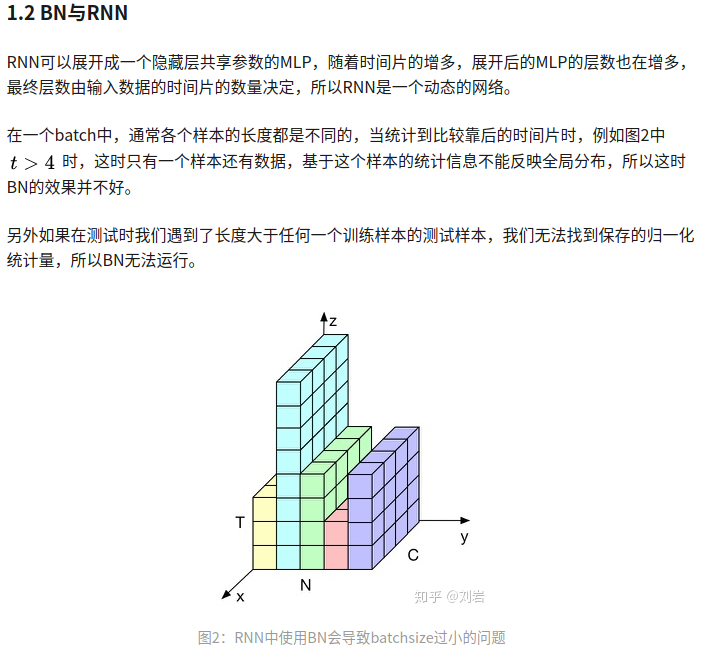

### 模型优化之Layer Normalization
https://zhuanlan.zhihu.com/p/54530247
### BatchNorm, LayerNorm, InstanceNorm和GroupNorm总结
https://mathpretty.com/11223.html

### BN并不适用于RNN等动态网络和batchsize较小的时候效果不好。

### LN和BN不同点是归一化的维度是互相垂直的，如图1所示。在图1中N 表示样本轴， C表示通道轴， F 是每个通道的特征数量。BN如右侧所示，它是取不同样本的同一个通道的特征做归一化；LN则是如左侧所示，它取的是同一个样本的不同通道做归一化。
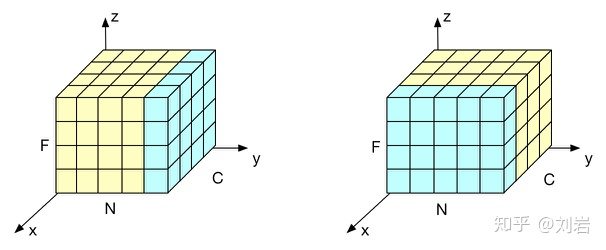
### 图1：LN(左)和BN(右)对比示意图

### 数据中心化和标准化在回归分析中的意义是取消由于量纲不同、自身变异或者数值相差较大所引起的误差。

### nn.BatchNorm1d(dim_count)：int expected 2D or 3D input (got 4D input)
### nn.BatchNorm2d(dim_count)：int expected 4D，dim_count    running_mean should contain 2 elements not 5

### BatchNorm*d(int):这个int值取是张量的第２维度数，而其归一化就是针对形状中的第一个位置进行的.当张量是一个多张多个通道的图像数据时，其就是对不同样本的相同通道数据进行归一化。
### LayerNorm(int):这个int取值是张量的最后一个维度数，而其归一化就是针对形状中的最后一个位置进行的。当张量是一个多张多个通道的图像数据时，其就是对每一样本的每个通道的每一条数据进行归一化。当张量是一个多张多个通道的图像数据时，其就是对不同样本的相同通道数据进行归一化。当张量是一个多个样本多个序列的视频数据时，其会对序列中的每一条特征数据进行归一化。（以一个序列为单位）

### 每一种方式适合的场景
batchNorm是在batch上，对小batchsize效果不好;  
layerNorm在通道方向上，主要对RNN作用明显；  
instanceNorm在图像像素上，用在风格化迁移；  
GroupNorm将channel分组，然后再做归一化, 在batchsize<16的时候, 可以使用这种归一化；


In [145]:
a = torch.tensor([[1,2,-1,2,1],
                  [3,2,-2,2,1],
                  [2,2,-1,1,3]]).float()

In [119]:
a.shape

torch.Size([3, 5])

In [120]:
# 对一行数据进行归一化：[1,2,-1,1,1]
norm = nn.LayerNorm(5)
b = norm(a)

In [121]:
b

tensor([[ 0.2041,  1.2247, -1.8371,  0.2041,  0.2041],
        [ 0.6799,  1.1655, -1.7483,  0.1943, -0.2914],
        [ 0.4423,  0.4423, -1.7693, -0.2949,  1.1795]],
       grad_fn=<NativeLayerNormBackward>)

In [146]:
# 对一列数据进行归一化：1
#                   3
#                   2
# running_mean should contain 5 elements not 3
norm = nn.BatchNorm1d(5)
b1 = norm(a)

In [147]:
b1

tensor([[-1.2247,  0.0000,  0.7071,  0.7071, -0.7071],
        [ 1.2247,  0.0000, -1.4142,  0.7071, -0.7071],
        [ 0.0000,  0.0000,  0.7071, -1.4142,  1.4142]],
       grad_fn=<NativeBatchNormBackward>)

In [148]:
a1 = torch.tensor([[[1,2,-1,1,1],
                    [3,2,-2,2,1],
                    [2,2,-1,1,3]],
                   [[1,2,-1,1,2],
                    [3,4,-2,2,3],
                    [5,2,-1,1,1]]]).float()

In [149]:
a1.shape

torch.Size([2, 3, 5])

In [150]:
# 对一行数据进行归一化：[1,2,-1,1,1]
norm = nn.LayerNorm(5)
c = norm(a1)

In [151]:
c

tensor([[[ 0.2041,  1.2247, -1.8371,  0.2041,  0.2041],
         [ 1.0462,  0.4650, -1.8600,  0.4650, -0.1162],
         [ 0.4423,  0.4423, -1.7693, -0.2949,  1.1795]],

        [[ 0.0000,  0.9129, -1.8257,  0.0000,  0.9129],
         [ 0.4767,  0.9535, -1.9069,  0.0000,  0.4767],
         [ 1.7351,  0.2041, -1.3268, -0.3062, -0.3062]]],
       grad_fn=<NativeLayerNormBackward>)

In [183]:
# 对batch[0]与batch[1]中对应行进行归一化：[1,2,-1,1,1]、[1,2,-1,1,2]
# running_mean should contain 3 elements not 5
norm = nn.BatchNorm1d(3)
c1 = norm(a1)

In [184]:
c1

tensor([[[ 0.0958,  1.0536, -1.8199,  0.0958,  0.0958],
         [ 0.7144,  0.2041, -1.8371,  0.2041, -0.3062],
         [ 0.2962,  0.2962, -1.4809, -0.2962,  0.8885]],

        [[ 0.0958,  1.0536, -1.8199,  0.0958,  1.0536],
         [ 0.7144,  1.2247, -1.8371,  0.2041,  0.7144],
         [ 2.0732,  0.2962, -1.4809, -0.2962, -0.2962]]],
       grad_fn=<NativeBatchNormBackward>)

In [185]:
a2 = torch.tensor([[[[1,2,-1,1,1],
                     [3,4,-2,2,1],
                     [1,2,-1,3,1]],
                    [[1,2,-1,1,1],
                     [3,4,-2,2,1],
                     [1,2,-1,1,1]]],
                   [[[1,2,-1,1,1],
                     [3,2,-2,2,1],
                     [2,2,-1,1,3]],
                    [[1,2,-1,1,2],
                     [3,4,-2,2,3],
                     [5,2,-1,1,1]]]]).float()

In [186]:
a2.shape

torch.Size([2, 2, 3, 5])

In [199]:
# 在一行上进行归一化：[1,2,-1,1,1]
norm = nn.LayerNorm(5)
d = norm(a2)

In [200]:
d

tensor([[[[ 0.2041,  1.2247, -1.8371,  0.2041,  0.2041],
          [ 0.6799,  1.1655, -1.7483,  0.1943, -0.2914],
          [-0.1508,  0.6030, -1.6583,  1.3568, -0.1508]],

         [[ 0.2041,  1.2247, -1.8371,  0.2041,  0.2041],
          [ 0.6799,  1.1655, -1.7483,  0.1943, -0.2914],
          [ 0.2041,  1.2247, -1.8371,  0.2041,  0.2041]]],


        [[[ 0.2041,  1.2247, -1.8371,  0.2041,  0.2041],
          [ 1.0462,  0.4650, -1.8600,  0.4650, -0.1162],
          [ 0.4423,  0.4423, -1.7693, -0.2949,  1.1795]],

         [[ 0.0000,  0.9129, -1.8257,  0.0000,  0.9129],
          [ 0.4767,  0.9535, -1.9069,  0.0000,  0.4767],
          [ 1.7351,  0.2041, -1.3268, -0.3062, -0.3062]]]],
       grad_fn=<NativeLayerNormBackward>)

In [192]:
# BatchNorm*d(int):这个int值取的是batch维度后面的那个维度数，而其归一化就是针对形状中的第一个位置进行的.
"""
[[1,2,-1,1,1],         [[1,2,-1,1,1],
 [3,4,-2,2,1],          [3,2,-2,2,1],
 [1,2,-1,3,1]],         [2,2,-1,1,3]],
"""
norm = nn.BatchNorm2d(2)
d1 = norm(a2)

In [190]:
d1

tensor([[[[-0.1122,  0.5611, -1.4589, -0.1122, -0.1122],
          [ 1.2345,  1.9078, -2.1323,  0.5611, -0.1122],
          [-0.1122,  0.5611, -1.4589,  1.2345, -0.1122]],

         [[-0.1790,  0.4176, -1.3721, -0.1790, -0.1790],
          [ 1.0141,  1.6107, -1.9686,  0.4176, -0.1790],
          [-0.1790,  0.4176, -1.3721, -0.1790, -0.1790]]],


        [[[-0.1122,  0.5611, -1.4589, -0.1122, -0.1122],
          [ 1.2345,  0.5611, -2.1323,  0.5611, -0.1122],
          [ 0.5611,  0.5611, -1.4589, -0.1122,  1.2345]],

         [[-0.1790,  0.4176, -1.3721, -0.1790,  0.4176],
          [ 1.0141,  1.6107, -1.9686,  0.4176,  1.0141],
          [ 2.2072,  0.4176, -1.3721, -0.1790, -0.1790]]]],
       grad_fn=<NativeBatchNormBackward>)

# Caption model

In [1]:
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn 

### mask掩码设计

In [18]:
def subsequent_mask(size):
    '''
    in: size               Sc
    out: (1, size, size)   (1,Sc,Sc)
    '''
    mask = torch.ones(1, size, size)
    mask = torch.tril(mask, 0)    # 返回矩阵下三角部分，其余部分定义为0

    return mask.byte()

In [19]:
def mask(src, trg, pad_idx):
    # masking the padding. src shape: (B, Sv) -> (B, 1, Sv)
    src_mask = (src != pad_idx).unsqueeze(1)
    if trg is not None:
        trg_mask = (trg != pad_idx).unsqueeze(-2) & subsequent_mask(trg.size(-1)).type_as(src_mask.data)
        return src_mask, trg_mask
    else:
        return src_mask

In [20]:
def make_masks(feature_stacks, captions, modality, pad_idx):
    masks = {}

    if modality == 'audio_video':
        assert len(feature_stacks['audio'].shape) == 3
        if captions is None:
            masks['A_mask'] = mask(feature_stacks['audio'][:, :, 0], None, pad_idx)
            masks['V_mask'] = mask(feature_stacks['video'][:, :, 0], None, pad_idx)
        else:
            masks['V_mask'], masks['C_mask'] = mask(feature_stacks['video'][:, :, 0], captions, pad_idx)
            masks['A_mask'] = mask(feature_stacks['audio'][:, :, 0], None, pad_idx)

    return masks

### self_attention注意力机制

In [21]:
def attention(Q, K, V, mask, dropout=None):
    # Q, K, V are (B, *(H), seq_len, d_model//H = d_k)
    # mask is     (B,    1,       1,               Sk)
    d_k = Q.size(-1)
    # (B, H, Sq, Sk)
    QKt = Q.matmul(K.transpose(-1, -2))
    sm_input = QKt / np.sqrt(d_k)

    # mask掉那些pad部分，使得注意力机制注意不到
    if mask is not None:
        sm_input = sm_input.masked_fill(mask == 0, -float('inf'))
        print('sm_input:\n', sm_input)

    softmax = F.softmax(sm_input, dim=-1)
    print('softmax:\n', softmax)
    out = softmax.matmul(V)

    if dropout is not None:
        out = dropout(out)

    # (B, *(H), seq_len, d_model//H = d_k)
    return out

In [22]:
class PositionalEncoder(nn.Module):

    def __init__(self, d_model, dout_p, seq_len=3660):
        super(PositionalEncoder, self).__init__()
        self.d_model = d_model
        self.dropout = nn.Dropout(dout_p)

        pos_enc_mat = np.zeros((seq_len, d_model))
        odds = np.arange(0, d_model, 2)
        evens = np.arange(1, d_model, 2)

        for pos in range(seq_len):
            pos_enc_mat[pos, odds] = np.sin(pos / (10000 ** (odds / d_model)))  # 替换pos行，odds列的数据
            pos_enc_mat[pos, evens] = np.cos(pos / (10000 ** (evens / d_model)))

        self.pos_enc_mat = torch.from_numpy(pos_enc_mat).unsqueeze(0)    # (1,3660.d_model)

    def forward(self, x):
        B, S, d_model = x.shape       # (32,S,d_model)
        print('s:\n', S)
        # torch.cuda.FloatTensor torch.FloatTensor
        x = x + self.pos_enc_mat[:, :S, :].type_as(x)    # 位置矩阵与特征矩阵直接相加
        x = self.dropout(x)
        # same as input
        return x       # (32,S,d_model)

In [23]:
class ResidualConnection(nn.Module):

    def __init__(self, size, dout_p):
        super(ResidualConnection, self).__init__()
        self.norm = nn.LayerNorm(size)
        self.dropout = nn.Dropout(dout_p)

    def forward(self, x, sublayer):  
        # x (B, S, D)
        res = self.norm(x)         # 对数据进行了层归一化
        res = sublayer(res)        # 对归一化的数据进行self-attention
        res = self.dropout(res)    # 进行dropout

        return x + res

In [24]:
# Encoder
# 特征设定
feature_stacks = {}
x1 = torch.randn(1,800,128)
x2 = torch.randn(1,300,1024)
C = torch.randn(1, 35).long()
caption_idx, caption_idx_y = C[:, :-1], C[:, 1:]
# x3 = torch.randn(1,10,1024)
feature_stacks['audio'] = x1
feature_stacks['video'] = x2

# 位置编码
pos_enc_A = PositionalEncoder(128, 0.1) 
pos_enc_V = PositionalEncoder(1024, 0.1)
A1 = pos_enc_A(x1)
V1 = pos_enc_V(x2)

# 1、Self-Attention
# 在进行Self-Attention之前的层归一化操作
norm = nn.LayerNorm(128)
A1 = norm(A1)
norm1 = nn.LayerNorm(1024)
V1 = norm1(V1)

# 下面就是一个完整的A_Self-Attention的过程
# Self-Attention之前的维度处理
# (B, H, Sm, d_k) <- (B, Sm, D) <- (B, Sm, Dm)
Q, K, V = A1, A1, A1
print('Q_in:\n', Q.shape, )
linear_Q2d = nn.Linear(128, 1024) 
linear_K2d = nn.Linear(128, 1024) 
linear_V2d = nn.Linear(128, 1024) 
Q = linear_Q2d(Q)        # (32,Sa,d_model)
K = linear_K2d(K)      
V = linear_V2d(V) 

# Self-Attention之前的多头机制
Q = Q.view(1, -1, 4, 256).transpose(-3, -2)
K = K.view(1, -1, 4, 256).transpose(-3, -2)
V = V.view(1, -1, 4, 256).transpose(-3, -2)

# Self-Attention之前的mask机制
# (B, 1, 1, Sa) <- (B,1,Sa),the same mask for all heads
masks = make_masks(feature_stacks, caption_idx, 'audio_video', 1)
M_A = masks['A_mask']
M_V = masks['V_mask']
M_C = masks['C_mask']
# print('M_A:\n', M_A.shape)
# print('M_V:\n', M_V.shape)
# print('M_C:\n', M_C.shape, M_C)
M_A[:,:,268:] = 0
M_V[:,:,128:] = 0
M_C[:,30:,:] = 0
# print('M_C:\n',  M_C)

M_A = M_A.unsqueeze(1)
M_V = M_V.unsqueeze(1)
M_C = M_C.unsqueeze(1)

# Self-Attention
Q_att_A1 = attention(Q, K, V, M_A)

# Self-Attention之后的多头机制
# (B, Sq, D) <- (B, H, Sq, d_k)
Q_att_A1 = Q_att_A1.transpose(-3, -2).contiguous().view(1, 800, 1024)

# Self-Attention之后的维度处理
linear_d2Q = nn.Linear(1024, 128)
Q2_linear_A1 = linear_d2Q(Q_att_A1)

# Self-Attention之后的dropout
dropout = nn.Dropout(0.1)
Q2_linear_A1 = dropout(Q2_linear_A1)
print('Q2_out:\n', Q2_linear_A1.shape)

# 残差链接
A2 = A1 + Q2_linear_A1

# 下面就是一个完整的V_Self-Attention的过程
# Self-Attention之前的维度处理
# (B, H, Sm, d_k) <- (B, Sm, D) <- (B, Sm, Dm)
Q, K, V = V1, V1, V1
linear_Q2d = nn.Linear(1024, 1024) 
linear_K2d = nn.Linear(1024, 1024) 
linear_V2d = nn.Linear(1024, 1024) 
Q = linear_Q2d(Q)        # (32,Sa,d_model)
K = linear_K2d(K)      
V = linear_V2d(V) 

# Self-Attention之前的多头机制
Q = Q.view(1, -1, 4, 256).transpose(-3, -2)
K = K.view(1, -1, 4, 256).transpose(-3, -2)
V = V.view(1, -1, 4, 256).transpose(-3, -2)

# Self-Attention
Q_att_V1 = attention(Q, K, V, M_V)

# Self-Attention之后的多头机制
# (B, Sq, D) <- (B, H, Sq, d_k)
Q_att_V1 = Q_att_V1.transpose(-3, -2).contiguous().view(1, 300, 1024)

# Self-Attention之后的维度处理
linear_d2Q = nn.Linear(1024, 1024)
Q2_linear_V1 = linear_d2Q(Q_att_V1)

# Self-Attention之后的dropout
dropout = nn.Dropout(0.1)
Q2_linear_V1 = dropout(Q2_linear_V1)

# 残差链接
V2 = V1 + Q2_linear_V1

s:
 800
s:
 300
Q_in:
 torch.Size([1, 800, 128])
sm_input:
 tensor([[[[ 0.2771,  0.0942, -0.0013,  ...,    -inf,    -inf,    -inf],
          [-0.0414, -0.5168, -0.0290,  ...,    -inf,    -inf,    -inf],
          [-0.2403, -0.2487,  0.2190,  ...,    -inf,    -inf,    -inf],
          ...,
          [-0.1522,  0.1137,  0.4038,  ...,    -inf,    -inf,    -inf],
          [ 0.3485,  0.5219,  0.1514,  ...,    -inf,    -inf,    -inf],
          [ 0.0020,  0.1155, -0.0631,  ...,    -inf,    -inf,    -inf]],

         [[ 0.0575,  0.4245, -0.1682,  ...,    -inf,    -inf,    -inf],
          [-0.0064,  0.0441,  0.0842,  ...,    -inf,    -inf,    -inf],
          [-0.4638, -0.2363, -0.6508,  ...,    -inf,    -inf,    -inf],
          ...,
          [-0.1065,  0.1135, -0.4106,  ...,    -inf,    -inf,    -inf],
          [ 0.1437,  0.1950,  0.0535,  ...,    -inf,    -inf,    -inf],
          [ 0.3045, -0.0803, -0.2150,  ...,    -inf,    -inf,    -inf]],

         [[ 0.2170, -0.0969,  0.4754,  ...

In [25]:
# 2、Bi-model Attention
# 在进行Multimodal Attention之前的层归一化操作
norm = nn.LayerNorm(128)
A2 = norm(A2)
norm1 = nn.LayerNorm(1024)
V2 = norm1(V2)

# 下面就是一个完整的A_Multimodal Attention的过程
# Multimodal Attention之前的维度处理
# (B, H, Sa, d_k) <- (B, Sa, D) <- (B, Sa, Da)
# (B, H, Sv, d_k) <- (B, Sv, D) <- (B, Sv, Dv)
Q, K, V = A2, V2, V2
print('Q_A2:\n', Q.shape)
linear_Q2d = nn.Linear(128, 1024) 
linear_K2d = nn.Linear(1024, 1024) 
linear_V2d = nn.Linear(1024, 1024) 
Q = linear_Q2d(Q)        # (32,Sa,d_model)
K = linear_K2d(K)      
V = linear_V2d(V) 

# Multimodal Attention之前的多头机制
Q = Q.view(1, -1, 4, 256).transpose(-3, -2)
K = K.view(1, -1, 4, 256).transpose(-3, -2)
V = V.view(1, -1, 4, 256).transpose(-3, -2)

# # Multimodal Attention之前的mask机制
# # (B, 1, 1, Sa) <- (B,1,Sa),the same mask for all heads
# masks = make_masks(feature_stacks, None, 'audio_video', 1)
# M_A = masks['A_mask']
# M_V = masks['V_mask']
# M_A[:,:,268:] = 0
# M_V[:,:,128:] = 0
# M_A = M_A.unsqueeze(1)
# M_V = M_V.unsqueeze(1)

# Multimodal Attention机制
Q_att_A2 = attention(Q, K, V, M_V)

# Multimodal Attention之后的多头机制
# (B, Sq, D) <- (B, H, Sq, d_k)
Q_att_A2 =Q_att_A2.transpose(-2,-3).contiguous().view(1,800,1024)

# Multimodal Attention之后的维度变化
linear_d2Q = nn.Linear(1024,128)
Q_linear_A2 = linear_d2Q(Q_att_A2)
print('Q_linear_A2:\n', Q_linear_A2.shape)

# 残差链接
A3 = A2 + Q_linear_A2

# 下面就是一个完整的V_Multimodal Attention的过程
# Multimodal Attention之前的维度处理
# (B, H, Sa, d_k) <- (B, Sa, D) <- (B, Sa, Da)
# (B, H, Sv, d_k) <- (B, Sv, D) <- (B, Sv, Dv)
Q, K, V = V2, A2, A2
print('Q_A2:\n', Q.shape)
linear_Q2d = nn.Linear(1024, 1024) 
linear_K2d = nn.Linear(128, 1024) 
linear_V2d = nn.Linear(128, 1024) 
Q = linear_Q2d(Q)        # (32,Sa,d_model)
K = linear_K2d(K)      
V = linear_V2d(V) 

# Multimodal Attention之前的多头机制
Q = Q.view(1, -1, 4, 256).transpose(-3, -2)
K = K.view(1, -1, 4, 256).transpose(-3, -2)
V = V.view(1, -1, 4, 256).transpose(-3, -2)

# # Multimodal Attention之前的mask机制
# # (B, 1, 1, Sa) <- (B,1,Sa),the same mask for all heads
# masks = make_masks(feature_stacks, None, 'audio_video', 1)
# M_A = masks['A_mask']
# M_V = masks['V_mask']
# M_A[:,:,268:] = 0
# M_V[:,:,128:] = 0
# M_A = M_A.unsqueeze(1)
# M_V = M_V.unsqueeze(1)

# Multimodal Attention机制
Q_att_V2 = attention(Q, K, V, M_A)

# Multimodal Attention之后的多头机制
# (B, Sq, D) <- (B, H, Sq, d_k)
Q_att_V2 =Q_att_V2.transpose(-2,-3).contiguous().view(1,300,1024)

# Multimodal Attention之后的维度变化
linear_d2Q = nn.Linear(1024,1024)
Q_linear_V2 = linear_d2Q(Q_att_V2)
print('Q_linear_V2:\n', Q_linear_V2.shape)

# 残差链接
V3 = V2 + Q_linear_V2

Q_A2:
 torch.Size([1, 800, 128])
sm_input:
 tensor([[[[ 0.2051,  0.4191,  0.1784,  ...,    -inf,    -inf,    -inf],
          [ 0.2591,  0.1861, -0.3730,  ...,    -inf,    -inf,    -inf],
          [ 0.2919, -0.2063, -0.2714,  ...,    -inf,    -inf,    -inf],
          ...,
          [ 0.3050,  0.0839,  0.3183,  ...,    -inf,    -inf,    -inf],
          [ 0.1335,  0.1742,  0.5143,  ...,    -inf,    -inf,    -inf],
          [-0.3126,  0.1823,  0.7714,  ...,    -inf,    -inf,    -inf]],

         [[-0.1298, -0.4304, -0.5245,  ...,    -inf,    -inf,    -inf],
          [ 0.3047, -0.4261,  0.0115,  ...,    -inf,    -inf,    -inf],
          [-0.1659, -0.5911, -0.4577,  ...,    -inf,    -inf,    -inf],
          ...,
          [ 0.8324, -0.0029, -0.1289,  ...,    -inf,    -inf,    -inf],
          [ 0.2944, -0.2683,  0.1434,  ...,    -inf,    -inf,    -inf],
          [ 0.0308,  0.4499,  0.2371,  ...,    -inf,    -inf,    -inf]],

         [[-0.1553, -0.2339, -0.2112,  ...,    -inf,    -i

In [26]:
# A两层全连接层
fc1 = nn.Linear(128, 128)
fc2 = nn.Linear(128, 128)
dropout = nn.Dropout(0.1)

# forward
A3_fc1 = fc1(A3)
A3_relu = F.relu(A3_fc1)
A3_dro = dropout(A3_relu)
A3_fc2 = fc2(A3_dro)

# 残差链接
A4 = A3 + A3_fc2

# V两层全连接层
fc1 = nn.Linear(1024, 1024)
fc2 = nn.Linear(1024, 1024)
dropout = nn.Dropout(0.1)

# forward
V3_fc1 = fc1(V3)
V3_relu = F.relu(V3_fc1)
V3_dro = dropout(V3_relu)
V3_fc2 = fc2(V3_dro)

# 残差链接
V4 = V3 + V3_fc2

In [27]:
A4.shape

torch.Size([1, 800, 128])

In [28]:
# Decoder
#　词向量编码
embedder = nn.Embedding(10172, 300)
caption_idx = torch.clamp(caption_idx, min=0)
print('embedder:\n', embedder)
print('caption_idx:\n', caption_idx)
caption_idx1 = embedder(caption_idx)
caption_idx1 = caption_idx1 * np.sqrt(300)

# 位置编码
pos_enc_C = PositionalEncoder(300, 0.1)
C1 = pos_enc_C(caption_idx1)
A2 = A4
V2 = V4

# 层归一化
norm = nn.LayerNorm(300)
C1 = norm(C1)
norm１ = nn.LayerNorm(128)
A2 = norm1(A2)
norm２ = nn.LayerNorm(1024)
V2 = norm2(V2)

# 1、Self-Attention－－残差连接
Q, K, V = C1, C1, C1
print('Q_A:\n', Q.shape)
linear_Q2d = nn.Linear(300, 1024) 
linear_K2d = nn.Linear(300, 1024) 
linear_V2d = nn.Linear(300, 1024) 
Q = linear_Q2d(Q)        # (32,Sa,d_model)
K = linear_K2d(K)      
V = linear_V2d(V) 

# Self-Attention之前的多头机制
Q = Q.view(1, -1, 4, 256).transpose(-3, -2)
K = K.view(1, -1, 4, 256).transpose(-3, -2)
V = V.view(1, -1, 4, 256).transpose(-3, -2)

# Self-Attention
Q_att_C1 = attention(Q, K, V, M_C)

# Self-Attention之后的多头机制
# (B, Sq, D) <- (B, H, Sq, d_k)
Q_att_C1 = Q_att_C1.transpose(-3, -2).contiguous().view(1, 34, 1024)

# Self-Attention之后的维度处理
linear_d2Q = nn.Linear(1024, 300)
Q2_linear_C1 = linear_d2Q(Q_att_C1)

# Self-Attention之后的dropout
dropout = nn.Dropout(0.1)
Q2_linear_C1 = dropout(Q2_linear_C1)
print('Q2_linear_C1:\n', Q2_linear_C1.shape)

# 残差链接
C2 = C1 + Q2_linear_C1

# 2、Multimodal Attention－－残差连接
# 在进行Multimodal Attention之前的层归一化操作
norm = nn.LayerNorm(300)
C2 = norm(C2)

# 下面就是一个完整的A_Multimodal Attention的过程
# Multimodal Attention之前的维度处理
# (B, H, Sc, d_k) <- (B, Sc, D) <- (B, Sc, Dc)
# (B, H, Sa, d_k) <- (B, Sa, D) <- (B, Sa, Da)
Q, K, V = C2, A2, A2
print('Q_C2:\n', Q.shape)
linear_Q2d = nn.Linear(300, 1024) 
linear_K2d = nn.Linear(128, 1024) 
linear_V2d = nn.Linear(128, 1024) 
Q = linear_Q2d(Q)        # (32,Sa,d_model)
K = linear_K2d(K)      
V = linear_V2d(V) 

# Multimodal Attention之前的多头机制
Q = Q.view(1, -1, 4, 256).transpose(-3, -2)
K = K.view(1, -1, 4, 256).transpose(-3, -2)
V = V.view(1, -1, 4, 256).transpose(-3, -2)

# Multimodal Attention机制
Q_att_CV2 = attention(Q, K, V, M_A)

# Multimodal Attention之后的多头机制
# (B, Sq, D) <- (B, H, Sq, d_k)
Q_att_CV2 =Q_att_CV2.transpose(-2,-3).contiguous().view(1,34,1024)

# Multimodal Attention之后的维度变化
linear_d2Q = nn.Linear(1024,300)
Q_linear_CV2 = linear_d2Q(Q_att_CV2)
print('Q_linear_CV2:\n', Q_linear_CV2.shape)

# 残差链接
CV2 = C2 + Q_linear_CV2

# 下面就是一个完整的V_Multimodal Attention的过程
# Multimodal Attention之前的维度处理
# (B, H, Sc, d_k) <- (B, Sc, D) <- (B, Sc, Dc)
# (B, H, Sv, d_k) <- (B, Sv, D) <- (B, Sv, Dv)
Q, K, V = C2, V2, V2
print('Q_C2:\n', Q.shape)
linear_Q2d = nn.Linear(300, 1024) 
linear_K2d = nn.Linear(1024, 1024) 
linear_V2d = nn.Linear(1024, 1024) 
Q = linear_Q2d(Q)        # (32,Sa,d_model)
K = linear_K2d(K)      
V = linear_V2d(V) 

# Multimodal Attention之前的多头机制
Q = Q.view(1, -1, 4, 256).transpose(-3, -2)
K = K.view(1, -1, 4, 256).transpose(-3, -2)
V = V.view(1, -1, 4, 256).transpose(-3, -2)

# Multimodal Attention机制
Q_att_CA2 = attention(Q, K, V, M_V)

# Multimodal Attention之后的多头机制
# (B, Sq, D) <- (B, H, Sq, d_k)
Q_att_CA2 =Q_att_CA2.transpose(-2,-3).contiguous().view(1,34,1024)

# Multimodal Attention之后的维度变化
linear_d2Q = nn.Linear(1024,300)
Q_linear_CA2 = linear_d2Q(Q_att_CA2)
print('Q_linear_CA2:\n', Q_linear_CA2.shape)

# 残差链接
CA2 = C2 + Q_linear_CA2

# Concat
CAV = torch.cat([CA2, CV2], dim=-1)

# 3、Bridge
norm = nn.LayerNorm(300*2)
CAV = norm(CAV)

linear = nn.Linear(300*2, 300)
CAV = linear(CAV)

dropout = nn.Dropout(0.1)
CAV = dropout(CAV)

activation = nn.ReLU()
CAV = activation(CAV)

# 4、PositionwiseFeedForward－－残差连接
# C两层全连接层
fc1 = nn.Linear(300, 300)
fc2 = nn.Linear(300, 300)
dropout = nn.Dropout(0.1)

# forward
CAV_fc1 = fc1(CAV)
CAV_relu = F.relu(CAV_fc1)
CAV_dro = dropout(CAV_relu)
CAV_fc2 = fc2(CAV_dro)

# 残差链接
CAV = CAV + CAV_fc2

# Generator
fc = nn.Linear(300, 10172)
CAV_fc = fc(CAV)
pred_idx = F.log_softmax(CAV_fc, dim=-1)        # lod(p(x))

embedder:
 Embedding(10172, 300)
caption_idx:
 tensor([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
         0, 0, 2, 1, 0, 0, 0, 0, 0, 2]])
s:
 34
Q_A:
 torch.Size([1, 34, 300])
sm_input:
 tensor([[[[ 0.5105,    -inf,    -inf,  ...,    -inf,    -inf,    -inf],
          [ 0.2289,  0.3119,    -inf,  ...,    -inf,    -inf,    -inf],
          [ 0.3298,  0.5147,  0.3436,  ...,    -inf,    -inf,    -inf],
          ...,
          [   -inf,    -inf,    -inf,  ...,    -inf,    -inf,    -inf],
          [   -inf,    -inf,    -inf,  ...,    -inf,    -inf,    -inf],
          [   -inf,    -inf,    -inf,  ...,    -inf,    -inf,    -inf]],

         [[-0.1516,    -inf,    -inf,  ...,    -inf,    -inf,    -inf],
          [ 0.0216,  0.0252,    -inf,  ...,    -inf,    -inf,    -inf],
          [-0.2671, -0.2576, -0.3279,  ...,    -inf,    -inf,    -inf],
          ...,
          [   -inf,    -inf,    -inf,  ...,    -inf,    -inf,    -inf],
          [   -inf,    -inf,  

### nn.CrossEntropyLoss():
#### nll_loss(log_softmax(input, 1), target, weight, None, ignore_index, None, reduction)

### F.kl_div(F.log_softmax(CAV_fc, dim=-1), dist, reduction='sum'):            
#### input: Tensor of arbitrary shape
#### target: Tensor of the same shape as input

### Label Smoothing

### 标签平滑的实质就是促使神经网络中进行softmax激活函数激活之后的分类概率结果向正确分类靠近，即正确的分类概率输出大（对应的one-hot标签为1位置的softmax概率大），并且同样尽可能的远离错误分类（对应的one-hot标签为0位置的softmax概率小），即错误的分类概率输出小。

In [29]:
pred_idx_y = torch.tensor([[0,4,3,2,1,1,1]]).float()

In [30]:
pred_idx = torch.randn(1,7,8).float()
pred_idx = F.log_softmax(pred_idx,-1)

In [31]:
def LabelSmoothing(pred, target): # pred (1, 7, 8), target (1, 7)
    # Note: preds are expected to be after log
    B, S, V = pred.shape
    # (B, S, V) -> (B * S, V); (B, S) -> (B * S)
    pred = pred.contiguous().view(-1, V)
    target = target.contiguous().view(-1)

    # prior (uniform)
    dist = 0.7 * torch.ones_like(pred) / (V - 2)
    
    # add smoothed ground-truth to prior (args: dim, index, src (value))
    dist.scatter_(1, target.unsqueeze(-1).long(), 1-0.7)
    
    # make the padding token to have zero probability
    dist[:, 1] = 0

    # ?? mask: 1 if target == pad_idx; 0 otherwise
    # 返回元素=pad_idx所在的位置
    mask = torch.nonzero(target == 1)
    print('mask.shape:\n', mask.shape)
    print('mask:\n', mask)

    if mask.sum() > 0 and len(mask) > 0:
        # dim, index, val
        dist.index_fill_(0, mask.squeeze(), 0)
    print('pred.shape:\n', pred.shape)    
    print('pred:\n', pred)
    print('dist.shape:\n', dist.shape)
    print('dist:', dist)

    return F.kl_div(pred, dist, reduction='sum')

In [32]:
loss = LabelSmoothing(pred_idx, pred_idx_y) / 4

mask.shape:
 torch.Size([3, 1])
mask:
 tensor([[4],
        [5],
        [6]])
pred.shape:
 torch.Size([7, 8])
pred:
 tensor([[-3.6972, -3.8804, -4.0911, -5.9626, -3.6416, -3.6223, -0.1861, -2.9534],
        [-1.1345, -3.0497, -2.6054, -2.7435, -3.7028, -2.5108, -1.8225, -1.4901],
        [-2.3118, -2.2656, -1.2235, -1.7668, -1.9722, -2.0286, -3.7390, -3.2798],
        [-3.2809, -2.1779, -2.6583, -2.1936, -0.9249, -2.9709, -2.2252, -2.1921],
        [-0.8387, -2.5695, -2.5738, -2.9361, -3.2220, -2.8738, -1.7708, -2.3509],
        [-1.8446, -1.8768, -3.3145, -1.3911, -2.1011, -3.6173, -2.8543, -1.6251],
        [-3.1881, -3.0130, -2.7708, -1.4755, -2.4286, -1.2459, -1.9056, -2.3669]])
dist.shape:
 torch.Size([7, 8])
dist: tensor([[0.3000, 0.0000, 0.1167, 0.1167, 0.1167, 0.1167, 0.1167, 0.1167],
        [0.1167, 0.0000, 0.1167, 0.1167, 0.3000, 0.1167, 0.1167, 0.1167],
        [0.1167, 0.0000, 0.1167, 0.3000, 0.1167, 0.1167, 0.1167, 0.1167],
        [0.1167, 0.0000, 0.3000, 0.1167, 0.1167

In [33]:
pred_idx_y1 = torch.tensor([[[1., 0., 0., 0., 0., 0., 0., 0.],
                             [0., 0., 0., 0., 1., 0., 0., 0.],
                             [0., 0., 0., 1., 0., 0., 0., 0.],
                             [0., 0., 1., 0., 0., 0., 0., 0.],
                             [0., 1., 0., 0., 0., 0., 0., 0.],
                             [0., 1., 0., 0., 0., 0., 0., 0.],
                             [0., 1., 0., 0., 0., 0., 0., 0.]]]).float()
loss1 = F.kl_div(pred_idx, pred_idx_y1, reduction='sum') / 4     # kl_div的输入是预测值和平滑后与预测值同维度的标签

### CrossEntropyLoss()

In [36]:
pred_idx = torch.randn(1,7,8).float()
pred_idx_y = torch.tensor([[0,4,3,2,1,1,1]]).float()
entroy=nn.CrossEntropyLoss()
pred_idx = pred_idx.squeeze(0)
pred_idx_y = pred_idx_y.squeeze(0).long()         # 要求标签是整形
loss2 = entroy(pred_idx, pred_idx_y)            # entroy的输入是预测值和整形标签

# Proposal model

In [40]:
class ProposalGenerationHead(nn.Module):

    def __init__(self, d_model_list, kernel_size, dout_p, layer_norm=False):
        super(ProposalGenerationHead, self).__init__()
        assert kernel_size % 2 == 1, 'It is more convenient to use odd kernel_sizes for padding'
        conv_layers = []
        in_dims = d_model_list[:-1]         # [128,512,512]
        out_dims = d_model_list[1:]         # [512,512,3*48]
        N_layers = len(d_model_list) - 1    # 3

        for n, (in_d, out_d) in enumerate(zip(in_dims, out_dims)):
            if layer_norm:
                conv_layers.append(Transpose())
                conv_layers.append(nn.LayerNorm(in_d))
                conv_layers.append(Transpose())

            if n == 0:
                conv_layers.append(nn.Conv1d(in_d, out_d, kernel_size, padding=kernel_size//2))
            else:
                conv_layers.append(nn.Conv1d(in_d, out_d, kernel_size=1))

            if n < (N_layers - 1):
                if dout_p > 0:
                    conv_layers.append(nn.Dropout(dout_p))
                conv_layers.append(nn.ReLU())

        self.conv_layers = nn.Sequential(*conv_layers)

    def forward(self, x):
        # (B, D, S) <- (B, S, D)  (32,128,S)<-(32,S,128)
        x = x.permute(0, 2, 1)
        # (B, d, S) <- (B, D, S)  (32,144,S)<-(32,128,S)
        x = self.conv_layers(x)
        # (B, S, d) <- (B, d, S)  (32,S,144)<-(32,144,S)
        x = x.permute(0, 2, 1)
        # x = self.fc_layer(x)
        return x

In [41]:
def tiou_vectorized(segments1, segments2, without_center_coords=False, center_length=True):

    def center_length_2_start_end(segments):
        '''there is get_corner_coords(predictions) and has a bit diffrenrent logic. both are kept'''
        # print('segments[:, 0]:\n', segments[:, 0])
        # print('segments[:, 1]:\n', segments[:, 1])
        start = segments[:, 0] - segments[:, 1] / 2
        end = segments[:, 0] + segments[:, 1] / 2
        return start, end

    # add 'fake' center coordinates. You can use any value, we use zeros
    if without_center_coords:
        segments1 = torch.cat([torch.zeros_like(segments1), segments1], dim=1) # 在第1维度与全0矩阵拼接起来
        segments2 = torch.cat([torch.zeros_like(segments2), segments2], dim=1)

    M, D = segments1.shape   # (48,2)
    N, D = segments2.shape   # (50,2)

    # TODO: replace with get_corner_coords from localization_utils
    if center_length:
        start1, end1 = center_length_2_start_end(segments1)
        start2, end2 = center_length_2_start_end(segments2)
    else:
        start1, end1 = segments1[:, 0], segments1[:, 1]
        start2, end2 = segments2[:, 0], segments2[:, 1]

    # broadcasting
    start1 = start1.view(M, 1)
    end1 = end1.view(M, 1)
    start2 = start2.view(1, N)
    end2 = end2.view(1, N)

    # calculate segments for intersection
    intersection_start = torch.max(start1, start2)    # (M,N) (48,50)
    intersection_end = torch.min(end1, end2)          # (M,N) (48,50)

    # we make sure that the area is 0 if size of a side is negative
    # which means that intersection_start > intersection_end which is not feasible
    # Note: adding one because the coordinates starts at 0 and let's
    intersection = torch.clamp(intersection_end - intersection_start, min=0.0)

    # finally we calculate union for each pair of segments
    union1 = (end1 - start1)
    union2 = (end2 - start2)
    union = union1 + union2 - intersection    # (M,1)+(1,N)-(M,N)
    # print('union":\n', union)
    union = torch.min(torch.max(end1, end2) - torch.min(start1, start2), union)
    # print('union1":\n', union)

    tious = intersection / (union + 1e-8)    # tious的计算公式
    # print('tious:\n', tious)
    return tious

In [42]:
def make_targets(predictions, targets, anchors, stride):
    '''
        The implementation relies on YOLOv3 for object detection
            - https://github.com/eriklindernoren/PyTorch-YOLOv3/blob/master/models.py
            - https://github.com/v-iashin/PersonalProjects/blob/master/detector/darknet.py
    '''
    print('targets_start!')
    B, num_anchs, G, num_feats = predictions.size()    # (16,48,800,3)

    # classes = 1
    EPS = 1e-16

    # create the placeholders
    noobj_mask = torch.ones(B, num_anchs, G).bool()   # (16,48,G) True矩阵
    obj_mask = torch.zeros_like(noobj_mask).bool()      # (16,48,G) False矩阵
    target_x = torch.zeros_like(noobj_mask).float()     # (16,48,G) 0.矩阵
    target_w = torch.zeros_like(noobj_mask).float()     # (16,48,G) 0.矩阵

    # image index within the batch, the g.t. label of an object on the image
    vid_idx = targets[:, 0].long()
    # ground truth center coordinates and bbox dimensions
    # since the target bbox coordinates are in seconds, we transform them into grid-axis
    # So, the gt_x will represent the position of the center in grid cells
    # Similarly, the size sizes are also scaled to grid size
    # 真实的中心坐标和bbox的尺寸
    gt_x = targets[:, 1] / stride
    gt_w = targets[:, 2] / stride
    # ious between scaled anchors (anchors_from_cfg / stride) and gt bboxes
    gt_anchor_ious = tiou_vectorized(anchors, gt_w.unsqueeze(-1), without_center_coords=True)
    # print('gt_anchor_ious:\n', gt_anchor_ious)
    # selecting the best anchors for the g.t. bboxes
    best_ious, best_anchors = gt_anchor_ious.max(dim=0)    # values,indices
    # print('best_ious:,best_anchors:\n', best_ious, best_anchors)

    # remove a decimal part -> gi point to the grid position to which an object will correspond 
    # for example: 9.89 -> 9
    gt_cell = gt_x.long()
    # helps with RuntimeError: CUDA error: device-side assert triggered
    # This aims to avoid gt_cell[i] exceeding the bounds
    gt_cell[gt_cell < 0] = 0
    gt_cell[gt_cell > G - 1] = G - 1

    # update the obj and noobj masks.
    # the noobj mask has 0 where obj mask has 1 and where IoU between
    # g.t. bbox and anchor is higher than ignore_thresh
    obj_mask[vid_idx, best_anchors, gt_cell] = 1
    noobj_mask[vid_idx, best_anchors, gt_cell] = 0

    # center shift: for example 9.89 -> 0.89
    # sigma_c = torch.sigmoid(x[:, :, :, 0])  # center
    target_x[vid_idx, best_anchors, gt_cell] = gt_x - gt_x.floor()

    # Yolo predicts the coefficients (log of coefs actually, see exp() in the paper) 
    # that will be used to multiply with anchor lengths for predicted segment lengths
    # Therefore, we modify targets and apply log transformation.
    # l = x[:, :, :, 1]  # length
    target_w[vid_idx, best_anchors, gt_cell] = torch.log(gt_w.t() / anchors[best_anchors][:, 0] + EPS)
    # since YOLO loss penalizes the model only for wrong predictions at the ground truth
    # cells, we extract only these predictions from the tensor
    # Extracting the labels from the prediciton tensor
    pred_x_w = predictions[vid_idx, best_anchors, gt_cell, :2]

    # ground truth objectness
    # sigma_o = torch.sigmoid(x[:, :, :, 2])
    target_obj = obj_mask.float()
    print('targets_end!')
    
    return obj_mask, noobj_mask, target_x, target_w, target_obj

In [43]:
# torch.cuda.set_device(0)
targets = torch.sigmoid(torch.randn(3,3))
targets[:,0] = 0
A4 = A4
V4 = V4

In [44]:
dims_A = [128, 512, 512, 3*48]
dims_V = [1024, 512, 512, 3*48]
layers_A = ProposalGenerationHead(dims_A, 1, 0.1)
layers_V = ProposalGenerationHead(dims_V, 1, 0.1)

anchors_list = [0.8478012,   1.6167145,   2.2273827,   2.8321495,   3.463749,    4.1754665,
                4.8919773,   5.604208,    6.3679543,   7.1533794,   7.9858913,   8.94029,
                9.918924,    10.930862,   12.016726,   13.1257515,  14.248297,   15.491314,
                16.7474,     18.115583,   19.56036,    21.16092,    22.840233,   24.653603,
                26.45147,    28.409119,   30.509735,   32.808224,   35.19283,    37.77707,
                40.586708,   43.895588,   47.447647,   51.493393,   56.0204,     61.034607,
                66.716415,   73.006874,   80.288155,   88.76068,    98.401535,   109.230865,
                121.956825,  137.82765,   156.4548,    178.53831,   203.67258,   233.61624  ]
anchors_num = len(anchors_list)   # 48
# in case targets is None
loss = 0
losses = {}

print('proposal_start!')
A_p = layers_A(A4)   # 1、proposal heads
print('proposal_end!')

B, S, D = A_p.shape  # (1,800,144)
A_p = A_p.view(1, 800, 48, 3)   # (1,800,48,3)

A_p = A_p.permute(0, 2, 1, 3).contiguous()     # (1,48,800,3)
# grid_cell = torch.arange(S).view(1, 1, S).float().to(self.cfg.device)
grid_cell = torch.arange(800).view(1, 1, 800).float()

anchors_list = [[anchor / 0.96] for anchor in anchors_list]    # ??stride=0.96
# anchors_tensor = torch.tensor(anchors_list, device=self.cfg.device)
anchors_tensor = torch.tensor(anchors_list)
# (A, 1) -> (1, A, 1) for broadcasting
prior_length = anchors_tensor.view(1, 48, 1)

# prediction values for the *loss* calculation (training)  2、prediction
sigma_c = torch.sigmoid(A_p[:, :, :, 0])  # center
l = A_p[:, :, :, 1]  # length
sigma_o = torch.sigmoid(A_p[:, :, :, 2])  # objectness

# 两者的结果是一样的，即返回的tensor和原tensor在梯度上或者数据上没有任何关系，一般用前者。
predictions = A_p.clone().detach()
# broadcasting (B, A, S) + (1, 1, S)

predictions[:, :, :, 0] = sigma_c + grid_cell           # center=p+σ(c)
# broadcasting (1, A, 1) * (B, A, S)
predictions[:, :, :, 1] = prior_length * torch.exp(l)   # length=anchors*exp(l)
predictions[:, :, :, 2] = sigma_o                       # confidence=σ(o)

print('make_targets!')
obj_mask, noobj_mask, gt_x, gt_w, gt_obj = make_targets(predictions, targets, anchors_tensor, 0.96)

proposal_start!
proposal_end!
make_targets!
targets_start!
targets_end!


In [45]:
obj_mask, noobj_mask, gt_x, gt_w, gt_obj

(tensor([[[ True, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]]),
 tensor([[[False,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          ...,
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True]]]),
 tensor([[[0.0967, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.00

In [46]:
sigma_c[obj_mask],gt_x[obj_mask],sigma_o[obj_mask],gt_obj[obj_mask]

(tensor([0.5157], grad_fn=<IndexBackward>),
 tensor([0.0967]),
 tensor([0.4976], grad_fn=<IndexBackward>),
 tensor([1.]))

## MSE和BCE的计算

### 凸优化和非凸优化
https://blog.csdn.net/StarCoder_WangYue/article/details/80397565

### BCE计算推导
https://www.cnblogs.com/sunrise-keephungary/p/10056027.html

### MSE计算含义
https://blog.csdn.net/xg123321123/article/details/80781611

### 分类问题用 One Hot Label + Cross Entropy Loss

Training 过程，分类问题用 Cross Entropy Loss，回归问题用 Mean Squared Error。

validation / testing 过程，使用 Classification Error更直观，也正是我们最为关注的指标。

In [47]:
bce_loss = nn.BCELoss()  # input一般为sigmoid激活层的输出，y必须是{0,1}。
mse_loss = nn.MSELoss()
prediction = torch.randn(4,8,3).float()
sigma_c = prediction[:,:,0]
gt_x = torch.randn(4,8).float()

obj_mask = torch.zeros(4,8).bool()
noobj_mask = torch.ones_like(obj_mask).bool()
print('obj_mask:\n', obj_mask)
print('noobj_mask:\n', noobj_mask)

# 创建虚假mask
a = torch.tensor([2,1,2,3,1])
b = torch.tensor([4,2,1,6,3])
obj_mask[a,b] = 1
noobj_mask[a,b] = 0

print('obj_mask1:\n', obj_mask)
print('noobj_mask1:\n', noobj_mask)

sigma_o = torch.sigmoid(prediction[:,:,2])

gt_obj = obj_mask.float()
# print('gt_x:\n', gt_x)
# print('gt_x1:\n', gt_x[obj_mask])

# print('sigma_c:\n', sigma_c)
# print('sigma_c1:\n', sigma_c[obj_mask])

# print('gt_obj:\n', gt_obj)
# print('gt_obj1:\n', gt_obj[obj_mask])
# print('gt_obj2:\n', gt_obj[noobj_mask])

# print('sigma_o:\n', sigma_o)
# print('sigma_o1:\n', sigma_o[obj_mask])
# print('sigma_o2:\n', sigma_o[noobj_mask])
loss_x = mse_loss(sigma_c[obj_mask], gt_x[obj_mask])
loss_obj = bce_loss(sigma_o[obj_mask], gt_obj[obj_mask])
loss_noobj = bce_loss(sigma_o[noobj_mask], gt_obj[noobj_mask])

obj_mask:
 tensor([[False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False]])
noobj_mask:
 tensor([[True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True]])
obj_mask1:
 tensor([[False, False, False, False, False, False, False, False],
        [False, False,  True,  True, False, False, False, False],
        [False,  True, False, False,  True, False, False, False],
        [False, False, False, False, False, False,  True, False]])
noobj_mask1:
 tensor([[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True, False, False,  True,  True,  True,  True],
        [ True, False,  True,  True, False,  True,  Tru

## Caption 评估指标

### evaluation-Blue

### BLUE得分比较候选文和参考译文里的ｎ-gram的重合程度，重合程度越高就认为译文质量越高。选不同长度的ｎ-graｍ准确率可以衡量单个单词的准确性及句子的流畅性－－－－精确率（查准率）

### Blue是一种流行的机器翻译评价指标，一种基于精确度的相似性度量方法，用于分析候选文和参考文中n元组共同出现的程度，由IBM于2002年提出。结果是待评价候选文中与参考文n元组(n-gram)的正确匹配次数与在候选文中所有n元组出现次数的比值。
### Blue在语料库层级上表现很好，但随着n的增加，在句子层级上匹配越来越差，因此，会偏向于较短的句子结果。

### BLEU，ROUGE，METEOR，ROUGE
浅述自然语言处理机器翻译常用评价度量

    客观评价指标
    – BLEU
    – ROUGE
    – METEOR
    – CIDEr
    主观评价指标
    – 流畅度
    – 相关性
    – 助盲性

### https://blog.csdn.net/joshuaxx316/article/details/58696552

In [48]:
def remove_nonascii(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])

In [49]:
def random_string(string_length):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(string_length))

In [50]:
import random
import string

In [51]:
import os
import sys
import subprocess
import tempfile
import itertools

# path to the stanford corenlp jar
STANFORD_CORENLP_3_4_1_JAR = './stanford-corenlp-3.4.1.jar'

# punctuations to be removed from the sentences
PUNCTUATIONS = ["''", "'", "``", "`", "-LRB-", "-RRB-", "-LCB-", "-RCB-", \
        ".", "?", "!", ",", ":", "-", "--", "...", ";"]

class PTBTokenizer:
    """Python wrapper of Stanford PTBTokenizer"""

    def tokenize(self, captions_for_image):
        cmd = ['java', '-cp', STANFORD_CORENLP_3_4_1_JAR, \
                'edu.stanford.nlp.process.PTBTokenizer', \
                '-preserveLines', '-lowerCase']

        # ======================================================
        # prepare data for PTB Tokenizer
        # ======================================================
        final_tokenized_captions_for_image = {}
        image_id = [k for k, v in captions_for_image.items() for _ in range(len(v))]
        sentences = '\n'.join([c['caption'].replace('\n', ' ') for k, v in captions_for_image.items() for c in v])

        # ======================================================
        # save sentences to temporary file
        # ======================================================
        path_to_jar_dirname=os.path.dirname(os.path.abspath('__file__'))
        tmp_file = tempfile.NamedTemporaryFile(delete=False, dir=path_to_jar_dirname)
        tmp_file.write(sentences.encode())
        tmp_file.close()

        # ======================================================
        # tokenize sentence
        # ======================================================
        cmd.append(os.path.basename(tmp_file.name))
        p_tokenizer = subprocess.Popen(cmd, cwd=path_to_jar_dirname, \
                stdout=subprocess.PIPE)
        token_lines = p_tokenizer.communicate(input=sentences.rstrip())[0]
        token_lines = token_lines.decode()
        lines = token_lines.split('\n')
        # remove temp file
        os.remove(tmp_file.name)

        # ======================================================
        # create dictionary for tokenized captions
        # ======================================================
        for k, line in zip(image_id, lines):
            if not k in final_tokenized_captions_for_image:
                final_tokenized_captions_for_image[k] = []
            tokenized_caption = ' '.join([w for w in line.rstrip().split(' ') \
                    if w not in PUNCTUATIONS])
            final_tokenized_captions_for_image[k].append(tokenized_caption)

        return final_tokenized_captions_for_image

In [52]:
# 创建PTB对象
tokenizer = PTBTokenizer()

In [53]:
cur_res = {0:[{'caption': 'She then demonstrate how to correctly makes a dish'}],
           1:[{'caption': 'A woman is standing in a kitchen kitchen kitchen with a large bowl and mixing ingredients in a bowl'}]}
cur_gts = {0:[{'caption': 'She then demonstrates how to properly make a dish'}],
           1:[{'caption': 'A woman is standing in a kitchen with a large bowl and mixing ingredients in a bowl'}]}
# 将大写字母全部转换为小写字母
tokenize_res = tokenizer.tokenize(cur_res)
tokenize_gts = tokenizer.tokenize(cur_gts)

In [54]:
tokenize_res

{0: ['she then demonstrate how to correctly makes a dish'],
 1: ['a woman is standing in a kitchen kitchen kitchen with a large bowl and mixing ingredients in a bowl']}

In [55]:
tokenize_gts

{0: ['she then demonstrates how to properly make a dish'],
 1: ['a woman is standing in a kitchen with a large bowl and mixing ingredients in a bowl']}

In [56]:
res = {}
gts = {}
res['vid_id'] = {0:tokenize_res[0],
                 1:tokenize_res[1]}
gts['vid_id'] = {0:tokenize_gts[0],
                 1:tokenize_gts[1]}

In [57]:
res

{'vid_id': {0: ['she then demonstrate how to correctly makes a dish'],
  1: ['a woman is standing in a kitchen kitchen kitchen with a large bowl and mixing ingredients in a bowl']}}

### BleuScorer类，实现计算Bleu得分

In [66]:
import copy
import sys, math, re
from collections import defaultdict


def precook(s, n=4, out=False):
    """Takes a string as input and returns an object that can be given to
    either cook_refs or cook_test. This is optional: cook_refs and cook_test
    can take string arguments as well."""
    words = s.split()
    counts = defaultdict(int)
#     print('counts:\n', counts)
    for k in range(1,n+1):
        for i in range(len(words)-k+1):
            ngram = tuple(words[i:i+k])
            counts[ngram] += 1
#     print('conuts:\n', counts)
    return (len(words), counts)


def cook_refs(refs, eff=None, n=4):  ## lhuang: oracle will call with "average"
    '''Takes a list of reference sentences for a single segment
    and returns an object that encapsulates everything that BLEU
    needs to know about them.'''

    reflen = []
    maxcounts = {}
    for ref in refs:
        print('ref:\n', ref)
        rl, counts = precook(ref, n)
        reflen.append(rl)
        for (ngram,count) in counts.items():
            maxcounts[ngram] = max(maxcounts.get(ngram,0), count)
#         print('maxcounts:\n', maxcounts)

    # Calculate effective reference sentence length.
    if eff == "shortest":
        reflen = min(reflen)
    elif eff == "average":
        reflen = float(sum(reflen))/len(reflen)

    ## lhuang: N.B.: leave reflen computaiton to the very end!!

    ## lhuang: N.B.: in case of "closest", keep a list of reflens!! (bad design)

    return (reflen, maxcounts)


def cook_test(test, refs, eff=None, n=4):
    '''Takes a test sentence and returns an object that
    encapsulates everything that BLEU needs to know about it.'''

    reflen, refmaxcounts = refs
    print('test:\n', test)
    testlen, counts = precook(test, n, True)

    result = {}

    # Calculate effective reference sentence length.

    if eff == "closest":
        result["reflen"] = min((abs(l-testlen), l) for l in reflen)[1]
    else: ## i.e., "average" or "shortest" or None
        result["reflen"] = reflen

    result["testlen"] = testlen

    result["guess"] = [max(0,testlen-k+1) for k in range(1,n+1)]

    result['correct'] = [0]*n
    for (ngram, count) in counts.items():
        result["correct"][len(ngram)-1] += min(refmaxcounts.get(ngram,0), count)

    return result


class BleuScorer(object):
    """Bleu scorer.
    """
    __slots__ = "n", "crefs", "ctest", "_score", "_ratio", "_testlen", "_reflen", "special_reflen"
    # special_reflen is used in oracle (proportional effective ref len for a node).

    def copy(self):
        ''' copy the refs.'''
        new = BleuScorer(n=self.n)
        new.ctest = copy.copy(self.ctest)
        new.crefs = copy.copy(self.crefs)
        new._score = None
        return new

    def __init__(self, test=None, refs=None, n=4, special_reflen=None):
        ''' singular instance '''

        self.n = n
        self.crefs = []
        self.ctest = []
        self.cook_append(test, refs)
        self.special_reflen = special_reflen

    def cook_append(self, test, refs):
        '''called by constructor and __iadd__ to avoid creating new instances.'''

        if refs is not None:
            self.crefs.append(cook_refs(refs))
#             print('self.crefs:\n', self.crefs)
            if test is not None:
                cooked_test = cook_test(test, self.crefs[-1])
                self.ctest.append(cooked_test) ## N.B.: -1
#                 print('self.ctest:\n', self.ctest)
            else:
                self.ctest.append(None) # lens of crefs and ctest have to match

        self._score = None ## need to recompute

    def ratio(self, option=None):
        self.compute_score(option=option)
        return self._ratio

    def score_ratio(self, option=None):
        '''return (bleu, len_ratio) pair'''
        return (self.fscore(option=option), self.ratio(option=option))

    def score_ratio_str(self, option=None):
        return "%.4f (%.2f)" % self.score_ratio(option)

    def reflen(self, option=None):
        self.compute_score(option=option)
        return self._reflen

    def testlen(self, option=None):
        self.compute_score(option=option)
        return self._testlen

    def retest(self, new_test):
        if type(new_test) is str:
            new_test = [new_test]
        assert len(new_test) == len(self.crefs), new_test
        self.ctest = []
        for t, rs in zip(new_test, self.crefs):
            self.ctest.append(cook_test(t, rs))
        self._score = None

        return self

    def rescore(self, new_test):
        ''' replace test(s) with new test(s), and returns the new score.'''

        return self.retest(new_test).compute_score()

    def size(self):
        assert len(self.crefs) == len(self.ctest), "refs/test mismatch! %d<>%d" % (len(self.crefs), len(self.ctest))
        return len(self.crefs)

    def __iadd__(self, other):
        '''add an instance (e.g., from another sentence).'''

        if type(other) is tuple:
            ## avoid creating new BleuScorer instances
            self.cook_append(other[0], other[1])
        else:
            assert self.compatible(other), "incompatible BLEUs."
            self.ctest.extend(other.ctest)
            self.crefs.extend(other.crefs)
            self._score = None ## need to recompute

        return self

    def compatible(self, other):
        return isinstance(other, BleuScorer) and self.n == other.n

    def single_reflen(self, option="average"):
        return self._single_reflen(self.crefs[0][0], option)

    def _single_reflen(self, reflens, option=None, testlen=None):

        if option == "shortest":
            reflen = min(reflens)
        elif option == "average":
            reflen = float(sum(reflens))/len(reflens)
        elif option == "closest":
            reflen = min((abs(l-testlen), l) for l in reflens)[1]
        else:
            assert False, "unsupported reflen option %s" % option

        return reflen

    def recompute_score(self, option=None, verbose=0):
        self._score = None
        return self.compute_score(option, verbose)

    def compute_score(self, option=None, verbose=0):
        n = self.n
        small = 1e-9
        tiny = 1e-15 ## so that if guess is 0 still return 0
        bleu_list = [[] for _ in range(n)]

        if self._score is not None:
            return self._score

        if option is None:
            option = "average" if len(self.crefs) == 1 else "closest"

        self._testlen = 0
        self._reflen = 0
        totalcomps = {'testlen':0, 'reflen':0, 'guess':[0]*n, 'correct':[0]*n}

        # for each sentence
        for comps in self.ctest:
            testlen = comps['testlen']
            self._testlen += testlen
            
            if self.special_reflen is None: ## need computation
                reflen = self._single_reflen(comps['reflen'], option, testlen)
            else:
                reflen = self.special_reflen

            self._reflen += reflen
            
            for key in ['guess','correct']:
                for k in range(n):
                    totalcomps[key][k] += comps[key][k]

            # append per image bleu score
            bleu = 1.
            for k in range(n):
                bleu *= (float(comps['correct'][k]) + tiny) \
                        /(float(comps['guess'][k]) + small)
                bleu_list[k].append(bleu ** (1./(k+1)))
            ratio = (testlen + tiny) / (reflen + small) ## N.B.: avoid zero division
            if ratio < 1:
                for k in range(n):
                    bleu_list[k][-1] *= math.exp(1 - 1/ratio)

            if verbose > 1:
                print(comps, reflen)

        totalcomps['reflen'] = self._reflen
        totalcomps['testlen'] = self._testlen

        bleus = []
        bleu = 1.
        for k in range(n):
            bleu *= float(totalcomps['correct'][k] + tiny) \
                    / (totalcomps['guess'][k] + small)
            bleus.append(bleu ** (1./(k+1)))
        ratio = (self._testlen + tiny) / (self._reflen + small) ## N.B.: avoid zero division
        if ratio < 1:
            for k in range(n):
                bleus[k] *= math.exp(1 - 1/ratio)

        if verbose > 0:
            print(totalcomps)
            print("ratio:", ratio)

        self._score = bleus
        return self._score, bleu_list

### 调用BleuScorer得分类对象来实现Bleu得分计算

In [67]:
class Bleu:
    def __init__(self, n=4):
        # default compute Blue score up to 4
        self._n = n
        self._hypo_for_image = {}
        self.ref_for_image = {}

    def compute_score(self, gts, res):

        assert(gts.keys() == res.keys())
        imgIds = gts.keys()

        bleu_scorer = BleuScorer(n=self._n)
        for id in imgIds:
            hypo = res[id]
            ref = gts[id]

            # Sanity check.
            assert(type(hypo) is list)
            assert(len(hypo) == 1)
            assert(type(ref) is list)
            assert(len(ref) >= 1)

            # hypo[0]是一个字典, ref是一个列表
            bleu_scorer += (hypo[0], ref)

        #score, scores = bleu_scorer.compute_score(option='shortest')
        score, scores = bleu_scorer.compute_score(option='closest', verbose=1)
        #score, scores = bleu_scorer.compute_score(option='average', verbose=1)

        # return (bleu, bleu_info)
        return score, scores

    def method(self):
        return "Bleu"

In [68]:
scorer = Bleu(4)

In [69]:
score, scores = scorer.compute_score(gts['vid_id'], res['vid_id'])

ref:
 she then demonstrates how to properly make a dish
test:
 she then demonstrate how to correctly makes a dish
ref:
 a woman is standing in a kitchen with a large bowl and mixing ingredients in a bowl
test:
 a woman is standing in a kitchen kitchen kitchen with a large bowl and mixing ingredients in a bowl
{'testlen': 28, 'reflen': 26, 'guess': [28, 26, 24, 22], 'correct': [23, 19, 14, 12]}
ratio: 1.076923076881657


In [70]:
scores

[[0.6666666665185187, 0.8947368420581717],
 [0.4999999998854169, 0.8918080720316771],
 [3.2931687792598418e-06, 0.8684416371770252],
 [8.783602617539847e-09, 0.8371837575885196]]

In [71]:
score

[0.8214285713992346, 0.7747739833204257, 0.704837416271619, 0.6610835555081324]

### evaluation-Meteor

### Meteor指标与人的主观评价更加接近，对于同义句、同义词、相同词干的候选句子均会给予一定的奖励，在评价句子流畅性时，用了chunk的概念(候选句和参考句能够对齐，空间排列上连续的单词形成一个chunk，对齐算法是一个有点复杂的启发式beam search)，chunk的数目越少意味着每个chunk的平均长度越长，也即候选句与参考句的语序越一致

### Meteor计算是需要预先给定一组校准m，而这组校准是基于WordNet同义词库，通过最小化对应语句中连续有序的块chunk来得出。计算的是对应最佳候选文和参考文之间的准确率和召回率的调和平均。最终评价基于chunk的分解匹配和表征分解匹配质量的调和平均，同时考虑了基于整个语料库的准确率和召回率，

In [72]:
import os
import sys
import subprocess
import threading

# Assumes meteor-1.5.jar is in the same directory as meteor.py.  Change as needed.
METEOR_JAR = './meteor-1.5.jar'
# print METEOR_JAR



class Meteor:

    def __init__(self):
        self.meteor_cmd = ['java', '-jar', '-Xmx2G', METEOR_JAR, \
                '-', '-', '-stdio', '-l', 'en', '-norm']
        self.meteor_p = subprocess.Popen(self.meteor_cmd, \
                cwd=os.path.dirname(os.path.abspath('__file__')), \
                stdin=subprocess.PIPE, \
                stdout=subprocess.PIPE, \
                stderr=subprocess.PIPE)
        # Used to guarantee thread safety
        self.lock = threading.Lock()

    def compute_score(self, gts, res):
        assert(gts.keys() == res.keys())
        imgIds = gts.keys()
        scores = []

        eval_line = 'EVAL'
        self.lock.acquire()
        for i in imgIds:
            assert(len(res[i]) == 1)
            stat = self._stat(res[i][0], gts[i])
            eval_line += ' ||| {}'.format(stat)

        self.meteor_p.stdin.write('{}\n'.format(eval_line).encode())
        self.meteor_p.stdin.flush()
        for i in range(0,len(imgIds)):
            scores.append(float(self.meteor_p.stdout.readline().strip()))
        score = float(self.meteor_p.stdout.readline().strip())
        self.lock.release()

        return score, scores

    def method(self):
        return "METEOR"

    def _stat(self, hypothesis_str, reference_list):
        # SCORE ||| reference 1 words ||| reference n words ||| hypothesis words
        hypothesis_str = hypothesis_str.replace('|||','').replace('  ',' ')
        score_line = ' ||| '.join(('SCORE', ' ||| '.join(reference_list), hypothesis_str))
        self.meteor_p.stdin.write('{}\n'.format(score_line).encode())
        self.meteor_p.stdin.flush()
        return self.meteor_p.stdout.readline().decode().strip()

    def _score(self, hypothesis_str, reference_list):
        self.lock.acquire()
        # SCORE ||| reference 1 words ||| reference n words ||| hypothesis words
        hypothesis_str = hypothesis_str.replace('|||','').replace('  ',' ')
        score_line = ' ||| '.join(('SCORE', ' ||| '.join(reference_list), hypothesis_str))
        self.meteor_p.stdin.write('{}\n'.format(score_line))
        stats = self.meteor_p.stdout.readline().strip()
        eval_line = 'EVAL ||| {}'.format(stats)
        # EVAL ||| stats
        self.meteor_p.stdin.write('{}\n'.format(eval_line))
        score = float(self.meteor_p.stdout.readline().strip())
        # bug fix: there are two values returned by the jar file, one average, and one all, so do it twice
        # thanks for Andrej for pointing this out
        score = float(self.meteor_p.stdout.readline().strip())
        self.lock.release()
        return score

    def __del__(self):
        self.lock.acquire()
        self.meteor_p.stdin.close()
        self.meteor_p.kill()
        self.meteor_p.wait()
        self.lock.release()

In [73]:
scorer1 = Meteor()
# score, scores = scorer1.compute_score(gts['vid_id'], res['vid_id'])

In [74]:
cur_res = {0:[{'caption': 'She then demonstrate how to correctly makes a dish'}],
           1:[{'caption': 'A woman is standing in a kitchen kitchen kitchen with a large bowl and mixing ingredients in a bowl'}]}
cur_gts = {0:[{'caption': 'She then demonstrates how to properly make a dish'}],
           1:[{'caption': 'A woman is standing in a kitchen with a large bowl and mixing ingredients in a bowl'}]}
# 将大写字母全部转换为小写字母
tokenize_res = tokenizer.tokenize(cur_res)
tokenize_gts = tokenizer.tokenize(cur_gts)
res = {}
gts = {}
res['vid_id'] = {0:tokenize_res[0],
                 1:tokenize_res[1]}
gts['vid_id'] = {0:tokenize_gts[0],
                 1:tokenize_gts[1]}

### 针对每一个视频给出一个得分

In [75]:
eval_line = 'EVAL'

hypothesis_str = res['vid_id'][0][0].replace('|||','').replace('  ',' ')
reference_list = gts['vid_id'][0]
score_line = ' ||| '.join(('SCORE', ' ||| '.join(reference_list), hypothesis_str))

scorer1.meteor_p.stdin.write('{}\n'.format(score_line).encode())
scorer1.meteor_p.stdin.flush()
stat = scorer1.meteor_p.stdout.readline().decode().strip()
eval_line += ' ||| {}'.format(stat)


hypothesis_str = res['vid_id'][1][0].replace('|||','').replace('  ',' ')
reference_list = gts['vid_id'][1]
score_line = ' ||| '.join(('SCORE', ' ||| '.join(reference_list), hypothesis_str))

scorer1.meteor_p.stdin.write('{}\n'.format(score_line).encode())
scorer1.meteor_p.stdin.flush()
stat = scorer1.meteor_p.stdout.readline().decode().strip()
eval_line += ' ||| {}'.format(stat)

In [76]:
eval_line

'EVAL ||| 9.0 9.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 9.0 9.0 ||| 19.0 17.0 9.0 9.0 8.0 8.0 9.0 9.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 17.0 17.0'

In [77]:
score_line

'SCORE ||| a woman is standing in a kitchen with a large bowl and mixing ingredients in a bowl ||| a woman is standing in a kitchen kitchen kitchen with a large bowl and mixing ingredients in a bowl'

In [78]:
scores = []
scorer1.meteor_p.stdin.write('{}\n'.format(eval_line).encode())
scorer1.meteor_p.stdin.flush()
for i in range(0,2):
    scores.append(float(scorer1.meteor_p.stdout.readline().strip()))
score1 = float(scorer1.meteor_p.stdout.readline().strip())

In [79]:
scores

[0.8285714285714284, 0.5927523529586649]

In [80]:
score1

0.5882554762918963

## Proposal 评估指标

### 笔记：精确率和召回率在某种程度上是矛盾的，召回率又称查全率，要想查的全，其中一个方法就是多预测点，当预测增加的数量远大于增加的正样本的数量时，精确率就会下降，但此时召回率却会上升；所以为了更好的评估训练结果，一般会使用F1分数来进行评估，即考虑两者的调和平均，让PR同时达到最大值。

In [86]:
def evaluate_predictions(self):
    print(f'{self.cfg.max_prop_per_vid*self.segments_used/self.segments_total:.2f} props/vid')
    # during first epochs we have empty preds because we apply postprocess_preds() on preds
    if self.num_vid_w_no_props > 0:
        print(f'Number of videos with no proposals: {self.num_vid_w_no_props}')
    # blocks the printing
    with HiddenPrints():
        metrics = calculate_metrics(
            self.cfg.reference_paths, self.submission_path, self.cfg.tIoUs,
            self.cfg.max_prop_per_vid, verbose=True, only_proposals=True
        )
    return metrics

In [87]:
def evaluate():
    self.scores['Recall'] = []
    self.scores['Precision'] = []
    for tiou in [0.3,0.5,0.7,0.9]:
        precision, recall = self.evaluate_detection(tiou)
        self.scores['Recall'].append(recall)
        self.scores['Precision'].append(precision)

In [88]:
def iou(interval_1, interval_2):
    start_i, end_i = interval_1[0], interval_1[1]
    start, end = interval_2[0], interval_2[1]
    intersection = max(0, min(end, end_i) - max(start, start_i))
    union = min(max(end, end_i) - min(start, start_i), end-start + end_i-start_i)
    iou = float(intersection) / (union + 1e-8)
    return iou

In [102]:
refs = {}
refs['timestamps'] = [[0.28, 55.15], [13.79, 54.32]]
prediction = [{"timestamp": [0.0, 55.15]},{"timestamp": [2.3539, 51.63339]},{"timestamp": [4.91392, 49.3579]},
              {"timestamp": [0.0, 55.15]},{"timestamp": [0.0, 55.15]},{"timestamp": [0.0, 55.15]},
              {"timestamp": [0.37175, 6.5366]},{"timestamp": [5.44131, 53.80692]},{"timestamp": [17.22903, 55.15]},
              {"timestamp": [0.38773, 52.63206]}]

ref_set_covered = set([])
pred_set_covered = set([])

for pred_i, pred in enumerate(prediction):
    pred_timestamp = pred['timestamp']
    for ref_i, ref_timestamp in enumerate(refs['timestamps']):
        if iou(pred_timestamp, ref_timestamp) > 0.5:
            ref_set_covered.add(ref_i)
            pred_set_covered.add(pred_i)

### tIoUs=0.5

In [103]:
ref_set_covered

{0, 1}

In [104]:
pred_set_covered

{0, 1, 2, 3, 4, 5, 7, 8, 9}

In [105]:
best_precision = 0
new_precision = float(len(pred_set_covered)) / (pred_i + 1) 
best_precision = max(best_precision, new_precision)

In [106]:
best_precision

0.9

In [107]:
best_recall = 0
new_recall = float(len(ref_set_covered)) / len(refs['timestamps'])
best_recall = max(best_recall, new_recall)

In [108]:
best_recall

1.0

In [115]:
best_precision = 0
best_recall = 0
refs = {}
refs['timestamps'] = [[0, 10.23], [10.6, 39.84], [38.01, 73.1]]
prediction = [{"timestamp": [8.18602, 35.52781]},{"timestamp": [0.0, 19.28106]},{"timestamp": [68.5884, 70.58472]},
              {"timestamp": [36.3542, 70.89516]},{"timestamp": [9.83812, 11.32937]},{"timestamp": [9.1245, 14.39092]},
              {"timestamp": [0.3542, 0.89516]},{"timestamp": [19.83812, 20.32937]},{"timestamp": [28.1245, 29.39092]},
              {"timestamp": [0.35939, 4.62372]},{"timestamp": [0.0, 8.65043]},{"timestamp": [0.0, 15.25779]},
              {"timestamp": [35.21015, 64.20793]},{"timestamp":[0.57206, 63.30066]},{"timestamp": [0.0, 27.67549]}]

# {"timestamp": [0.0, 8.18602]},{"timestamp": [0.0, 19.28106]},{"timestamp": [68.5884, 70.58472]},
# {"timestamp": [0.0, 17.89516]},{"timestamp": [0.83812, 11.32937]},{"timestamp": [0.0, 14.39092]},

ref_set_covered = set([])
pred_set_covered = set([])

for pred_i, pred in enumerate(prediction):
    pred_timestamp = pred['timestamp']
    for ref_i, ref_timestamp in enumerate(refs['timestamps']):
        if iou(pred_timestamp, ref_timestamp) > 0.5:
            ref_set_covered.add(ref_i)
            pred_set_covered.add(pred_i)

In [116]:
new_precision = float(len(pred_set_covered)) / (pred_i + 1) 
best_precision = max(best_precision, new_precision)

new_recall = float(len(ref_set_covered)) / len(refs['timestamps'])
best_recall = max(best_recall, new_recall)

In [117]:
best_precision,best_recall

(0.4, 1.0)

In [118]:
ref_set_covered,pred_set_covered

({0, 1, 2}, {0, 1, 3, 10, 11, 12})

### 计算F1分数

In [126]:
def calculate_f1(recall, precision):
    f1 = 2*recall*precision / (recall + precision + 1e-16)
    return f1

anet_metrics = {0.3:{'Precision':0.6,'Recall':1.0},
                0.5:{'Precision':0.4,'Recall':1.0},
                0.7:{'Precision':0.2,'Recall':1.0},
                0.9:{'Precision':0,'Recall':0}}

for tIoU in [0.3,0.5,0.7,0.9]:
    precision = anet_metrics[tIoU]['Precision']
    recall = anet_metrics[tIoU]['Recall']
    f1 = calculate_f1(recall, precision)
    print(precision,recall,f1)

0.6 1.0 0.7499999999999999
0.4 1.0 0.5714285714285715
0.2 1.0 0.33333333333333337
0 0 0.0
